## Importing the libraries

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

## Creating base `Operation` class

In [4]:
class Operation():
    
    def __init__(self, input_nodes = []):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
            
    def compute(self):
        pass

## Creating example operations

In [5]:
class add(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
        
    def compute(self, x, y):
        
        self.inputs = [x, y]
        
        return x + y

In [6]:
class multiply(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
        
    def compute(self, x, y):
        
        self.inputs = [x, y]
        
        return x * y

In [7]:
class matmul(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
        
    def compute(self, x, y):
        
        self.inputs = [x, y]
        
        return x.dot(y)

## Creating `Placeholder` class

In [8]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

## Creating `Variable` class

In [9]:
class Variable():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

## Creating `Graph` class

In [10]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

## Creating `traverse_postorder` function

In [11]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
            
    recurse(operation)
    
    return nodes_postorder

## Creating `Session` class

In [12]:
class Session():
    
    def run(self, operation, feed_dict = {}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

## Example 

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [13]:
# Single values

g = Graph()
g.set_as_default()

A = Variable(10)
b = Variable(1)

x = Placeholder()

y = multiply(A, x)
z = add(y, b)

sess = Session()
result = sess.run(operation = z, feed_dict = {x: 10})

print(result)

101


In [14]:
# Matrix values

g = Graph()
g.set_as_default()

A = Variable([[1, 2], [3, 4]])
b = Variable([1, 2])

x = Placeholder()

y = matmul(A, x)
z = add(y, b)

sess = Session()
result = sess.run(operation = z, feed_dict = {x: 10})

print(result)

[[11 22]
 [31 42]]


## Creating activation function class

In [15]:
class sigmoid(Operation):
    
    def __init__(self, z):
        
        super().__init__([z])
        
        
    def compute(self, z):
        
        return 1 / (1 + np.exp(-z))

## Data preprocessing

In [16]:
dataset = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 75)

In [17]:
dataset

(array([[ 7.61931252e+00,  9.25367084e+00],
        [ 8.62924727e+00,  7.95324031e+00],
        [ 7.58264275e+00,  8.70372438e+00],
        [ 1.31977821e+00, -7.27106670e+00],
        [ 2.41247647e+00, -9.99341197e+00],
        [ 8.03307900e+00,  9.14918227e+00],
        [ 1.06965742e+00, -8.16482510e+00],
        [ 8.24497700e+00,  7.84672005e+00],
        [ 1.93525980e+00, -7.17127649e+00],
        [ 7.15614551e+00,  9.19767913e+00],
        [ 3.04605603e+00, -7.50486114e+00],
        [ 8.10102654e+00,  8.75813782e+00],
        [ 7.31557237e+00,  9.14404937e+00],
        [ 3.42929482e+00, -7.80419369e+00],
        [ 1.37717651e+00, -1.02226348e+01],
        [-2.66966481e-01, -8.00678506e+00],
        [ 1.82608307e+00, -5.36968617e+00],
        [ 6.85275523e+00,  9.19926872e+00],
        [ 9.56869106e-01, -7.91238745e+00],
        [ 8.24102706e-01, -1.02285428e+01],
        [ 1.96322881e+00, -9.50169117e+00],
        [ 8.59328012e+00,  8.93859056e+00],
        [ 9.33986161e+00,  7.506

In [18]:
features, labels = dataset[0], dataset[1]

In [19]:
x = np.linspace(-1, 11, 100)
y = -x + 5

Text(0, 0.5, 'Feature 2')

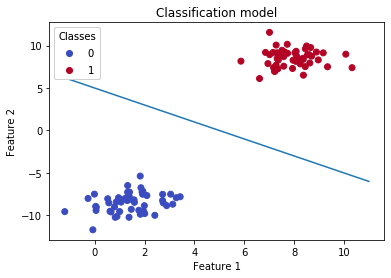

In [20]:
fig, ax = plt.subplots()
scatter = ax.scatter(features[:, 0], features[:, 1], c=labels, cmap = 'coolwarm')
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

plt.plot(x, y)
plt.title('Classification model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Example

y = mx + b

y = -x + 5

f2 = -f1 + 5

fm[1, 1] - 5 = 0

+ *f1 - feature 1*

+ *f2 - feature 2*

+ *fm - feature matrix*

## (1, 1)*f - 5 = 0

In [21]:
np.array([1, 1]).dot(np.array([[8], [10]])) - 5

array([13])

In [22]:
np.array([1, 1]).dot(np.array([[2], [-10]])) - 5

array([-13])

In [23]:
# Cartesian coordinates

g = Graph()
g.set_as_default()

x = Placeholder()

w = Variable([1, 1])
b = Variable(-5)

z = add(matmul(w, x), b)

a = sigmoid(z)

sess = Session()
result = sess.run(operation = a, feed_dict = {x: [8, 10]})

print(result)

0.999997739675702
